In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
# from importlib import reload
# import vehicles
# import game
# import agents
# import evaluation
# import models
# reload(vehicles)
# reload(game)
# reload(agents)
# reload(evaluation)
# reload(models)
# import torch

In [3]:
import random
random.seed(42)
import torch
torch.manual_seed(42)

In [4]:
#@title Vehicle provider
from vehicles import CompromiseState, Vehicle, VehicleProvider, Vulnerability, JsonVehicleProvider

class RubbishVehicleProvider(VehicleProvider):
    def __init__(self) -> None:
        self.max_vulns=1

    def next(self) -> Vehicle:
        return Vehicle(
            10,
            [
                Vulnerability(0.5,2,CompromiseState.NOT_COMPROMISED),
            ]
        )

provider = "rubbish" #@param ["default", "rubbish"]
if provider == "default":
  vehicle_provider = JsonVehicleProvider("../subgame/python/solutions.json")
elif provider == "rubbish":
  vehicle_provider=RubbishVehicleProvider()
else:
  raise ValueError("unknown provider chosen")

In [5]:
#@title Game config
from game import GameConfig

game_config=GameConfig(
    max_vehicles=30,
    cycle_every=1,
    cycle_allow_platoon=False,
    cycle_num=10
)

In [6]:
#@title Attacker agent
from agents import PassiveAgent, BasicAttackerAgent

attacker_ = "passive" #@param ["passive", "humanish"]
if attacker_ == "passive":
  attacker = PassiveAgent()
elif attacker_ == "humanish":
  attacker = BasicAttackerAgent(1)
else:
  raise ValueError("unknown attacker chosen")

In [7]:
#@title Defender agent
from agents import WolpertingerDefenderAgent
from models import StateShapeData

load_checkpoint = False #@param {type:"boolean"}
checkpoint = 1 #@param {type:"integer"}

defender=WolpertingerDefenderAgent(
    state_shape_data=StateShapeData(
        num_vehicles=game_config.max_vehicles,
        num_vehicle_features=Vehicle.get_shape()[0],
        num_vulns=vehicle_provider.max_vulns,
        num_vuln_features=Vulnerability.get_shape()[0]
    ),
    learning_rate=0.001
)

if load_checkpoint:
  defender.load(load_dir="checkpoints", load_prefix="2022-10-10 0046-15 276259")

c:\Users\TeamD\.conda\envs\subgame\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [8]:
#@title Trainer
from training import WolpertingerDefenderAgentTrainer
trainer = WolpertingerDefenderAgentTrainer(
    batch_size=1000,
)

In [9]:
stats_history = []

In [10]:
from training import WolpertingerDefenderAgentTrainerConfig
trainer_config = WolpertingerDefenderAgentTrainerConfig(
    game_config=game_config,
    vehicle_provider=vehicle_provider,
    attacker_agent=attacker,
    defender_agent=defender,
    episodes=50 + 200,
    max_steps_per_episode=25,
    warmup=200 * 25,
    metrics_callback=stats_history.append,
    update_policy_interval=10,
    policy_update_type="soft",
    checkpoint_interval=100,
)
latest_stats = trainer.train(config=trainer_config)

2022-10-10 0042-22 episode 0 step 0 
2022-10-10 0042-22 episode 0 step 1 
2022-10-10 0042-22 episode 0 step 2 
2022-10-10 0042-22 episode 0 step 3 
2022-10-10 0042-22 episode 0 step 4 
2022-10-10 0042-22 episode 0 step 5 
2022-10-10 0042-22 episode 0 step 6 
2022-10-10 0042-22 episode 0 step 7 
2022-10-10 0042-22 episode 0 step 8 
2022-10-10 0042-22 episode 0 step 9 
2022-10-10 0042-22 episode 0 step 10 
2022-10-10 0042-22 episode 0 step 11 
2022-10-10 0042-22 episode 0 step 12 
2022-10-10 0042-22 episode 0 step 13 
2022-10-10 0042-22 episode 0 step 14 
2022-10-10 0042-22 episode 0 step 15 
2022-10-10 0042-22 episode 0 step 16 
2022-10-10 0042-22 episode 0 step 17 
2022-10-10 0042-22 episode 0 step 18 
2022-10-10 0042-22 episode 0 step 19 
2022-10-10 0042-22 episode 0 step 20 
2022-10-10 0042-22 episode 0 step 21 
2022-10-10 0042-22 episode 0 step 22 
2022-10-10 0042-22 episode 0 step 23 
2022-10-10 0042-22 episode 0 step 24 
2022-10-10 0042-22 episode 1 step 0 
2022-10-10 0042-22 epis

KeyboardInterrupt: 

In [11]:
defender.save("checkpoints")

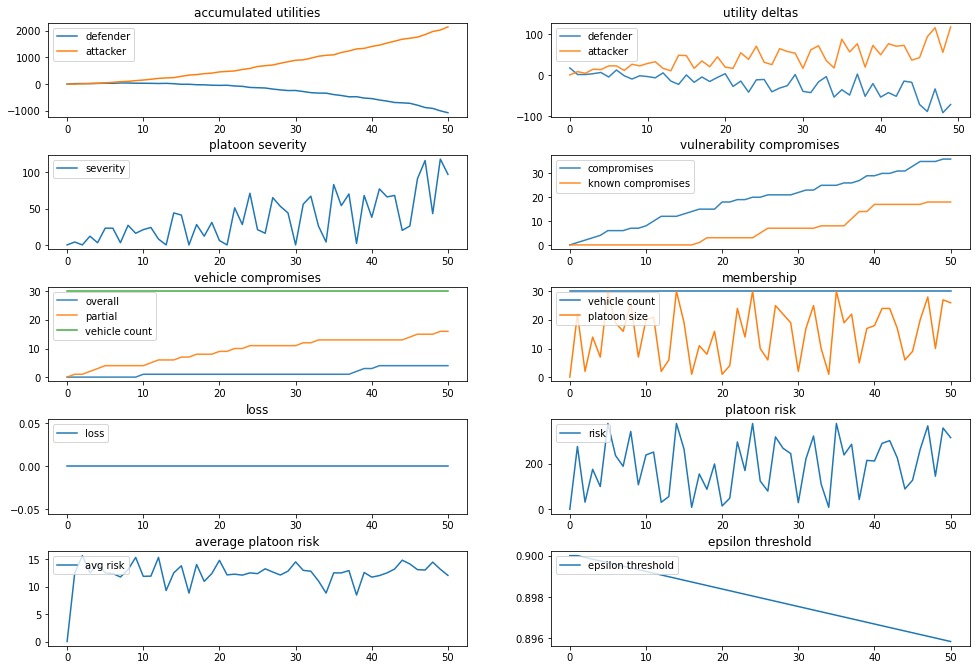

In [ ]:
stats_history[0].plot()

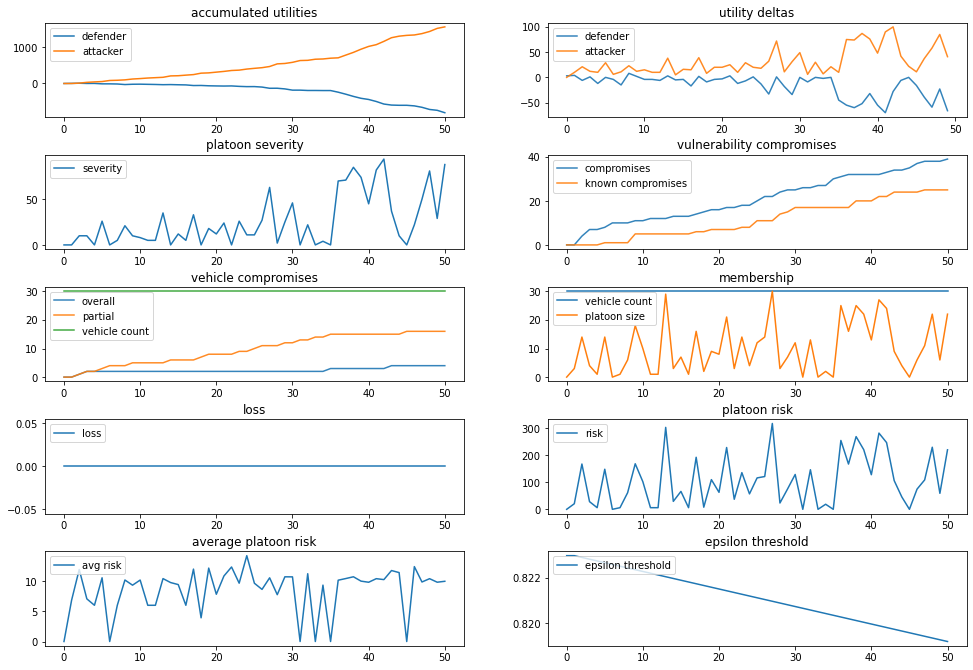

In [ ]:
stats_history[-1].plot()